<a href="https://colab.research.google.com/github/troncosofranco/Time-Series-Forecasting/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook study the anomaly detection of global temperature and finance data. The dataset of global temperature was obtained from [Datahub](https://datahub.io/core/global-temp#python) on a monthly basis.

#0. Install modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install yfinance

import yfinance as yf

!pip install adtk

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import *




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#1. Load Data

In [2]:
data = pd.read_csv('global_temperature.csv')

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data['Mean']


#2. Anomaly Detection

###2.1. Global temperature

In [9]:
quantile_detector = QuantileAD(low = 0.01, high= 0.99)
anomalies = quantile_detector.fit_detect(data)

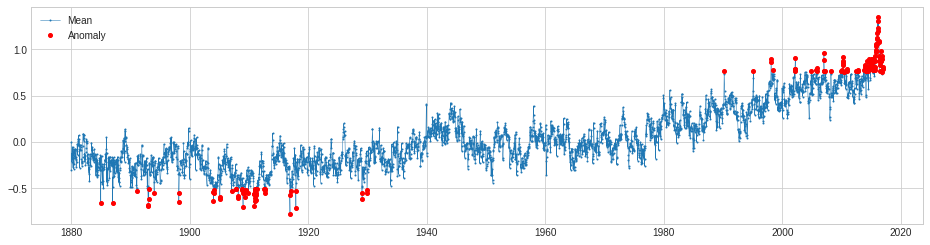

In [8]:
plot(data, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

###2.2. Finance

In [19]:
data = yf.download('TSLA')['Close']
data = validate_series(data)

[*********************100%***********************]  1 of 1 completed


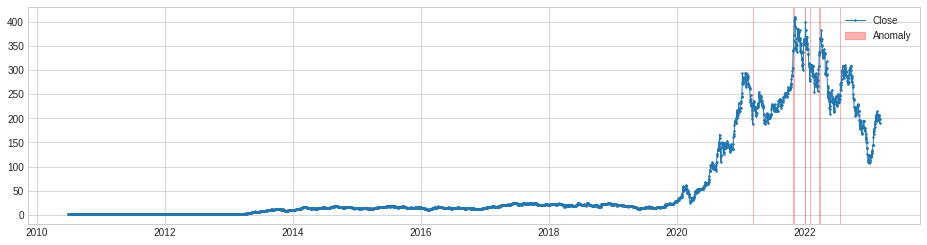

In [30]:
persist_detector = PersistAD(c= 30, side='positive')
anomalies = persist_detector.fit_detect(data)
plot(data, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red')
plt.show()

Volatility Detection

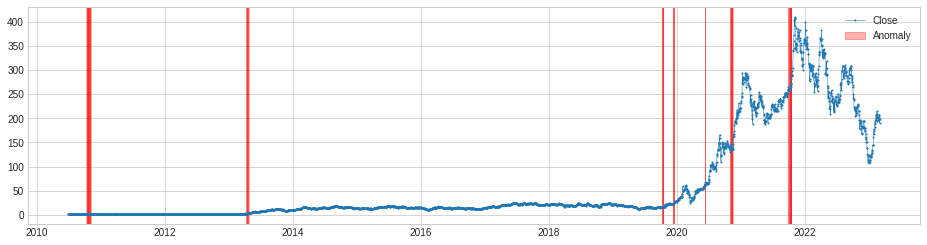

In [42]:
volatility_detector = VolatilityShiftAD(c=6, side='positive',window=25)
anomalies = volatility_detector.fit_detect(data)
plot(data, anomaly = anomalies, anomaly_color='red')
plt.show()